In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("t20-world-cup-22.csv")

In [7]:
data.head(10)

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
5,Blundstone Arena,Zimbabwe,South Africa,Super 12,Zimbabwe,Bat,79.0,5.0,51.0,0.0,NaN,NaN,NaN,Quinton de Kock,47.0,Lungi Ngidi,2-20
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
7,MCG,Ireland,England,Super 12,England,Field,157.0,10.0,105.0,5.0,Ireland,Runs,Andrew Balbirnie,Andrew Balbirnie,62.0,Liam Livingstone,3-17
8,MCG,New Zealand,Afghanistan,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SCG,South Africa,Bangladesh,Super 12,South Africa,Bat,205.0,5.0,101.0,10.0,South Africa,Runs,Rilee Rossouw,Rilee Rossouw,109.0,Anrich Nortje,4-10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [9]:
data.columns

Index(['venue', 'team1', 'team2', 'stage', 'toss winner', 'toss decision',
       'first innings score', 'first innings wickets', 'second innings score',
       'second innings wickets', 'winner', 'won by', 'player of the match',
       'top scorer', 'highest score', 'best bowler', 'best bowling figure'],
      dtype='object')

In [10]:
data.describe()

,first innings score,first innings wickets,second innings score,second innings wickets,highest score
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,153.366667,6.866667,130.800000,6.233333,64.066667
std,30.440992,2.096521,25.511863,3.013571,17.264541
min,79.000000,2.000000,51.000000,0.000000,32.000000
25%,134.000000,5.250000,113.500000,5.000000,52.500000
50%,157.000000,7.500000,136.000000,6.000000,62.000000
75%,179.000000,8.000000,147.750000,9.000000,70.250000
max,205.000000,10.000000,170.000000,10.000000,109.000000


In [12]:
data[data.duplicated()].shape


(0, 17)

In [13]:
data.drop_duplicates(inplace = True)


In [14]:
data.shape


(33, 17)

In [15]:
corr_df = data.corr()


In [16]:
corr_df

,first innings score,first innings wickets,second innings score,second innings wickets,highest score
first innings score,1.000000,-0.501697,0.337063,0.616248,0.574719
first innings wickets,-0.501697,1.000000,-0.030172,-0.240509,-0.295077
second innings score,0.337063,-0.030172,1.000000,-0.050951,0.062741
second innings wickets,0.616248,-0.240509,-0.050951,1.000000,0.266789
highest score,0.574719,-0.295077,0.062741,0.266789,1.000000


<AxesSubplot:>

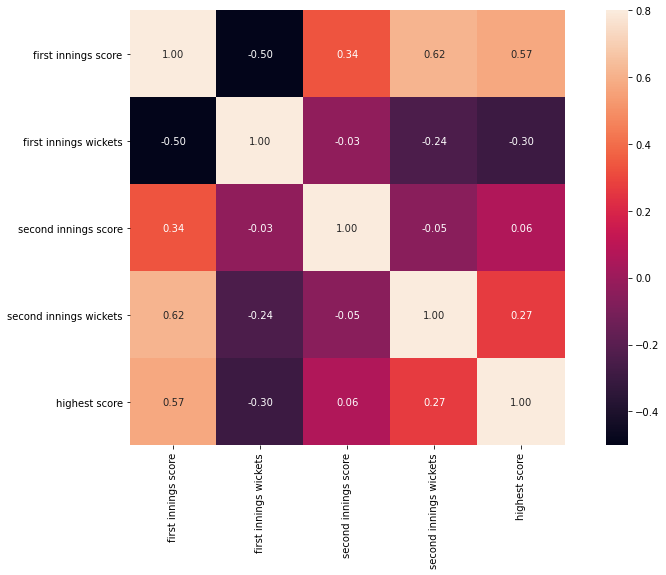

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True)


## **Number of Matches Won by teams in t20 World Cup 2022**

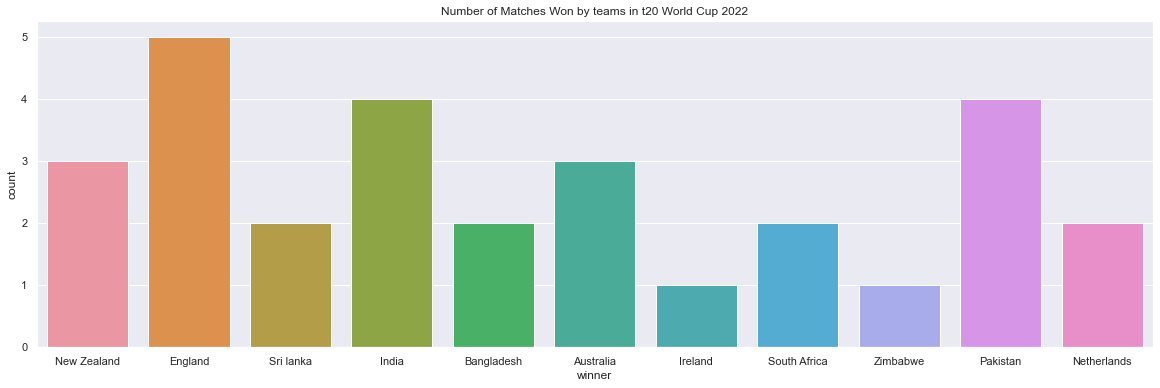

In [22]:
sns.countplot(data=data, x="winner")
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(25,6)})
plt.title("Number of Matches Won by teams in t20 World Cup 2022")
plt.show()


## **Number of Matches Won By Runs Or Wickets**





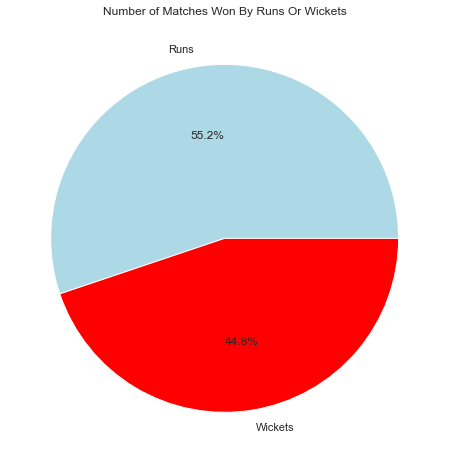

In [26]:
won_by = data["won by"].value_counts()
colors = ['lightblue','red']

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(8,8))
plt.pie(won_by.values, labels=won_by.index, autopct='%1.1f%%')
plt.title("Number of Matches Won By Runs Or Wickets")
plt.show()

## **Top Scorers in t20 World Cup 2022**

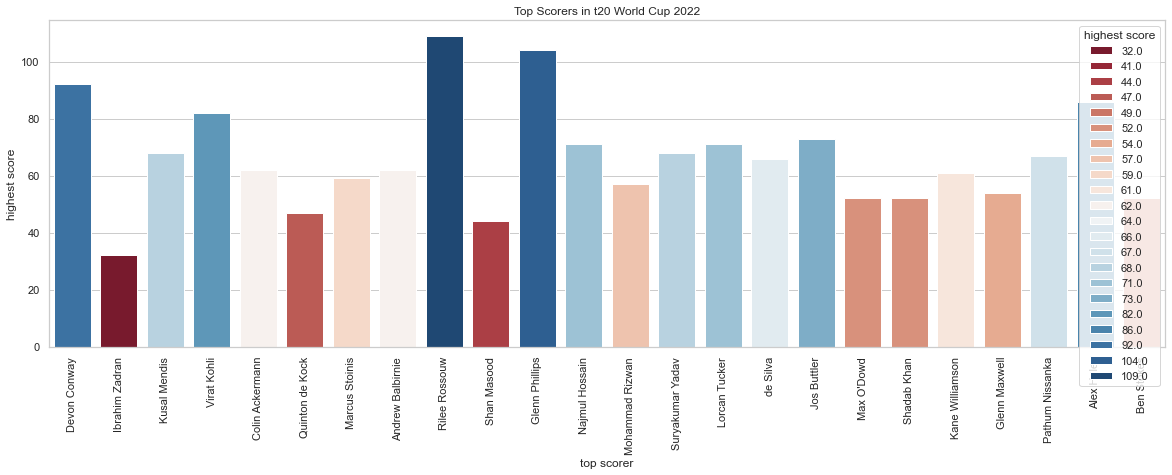

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
sns.barplot(data=data, x="top scorer", y="highest score", hue="highest score", dodge=False, palette="R")
plt.xticks(rotation=90)
plt.title("Top Scorers in t20 World Cup 2022")
plt.show()


## **Player of the Match Awards in t20 World Cup 2022**

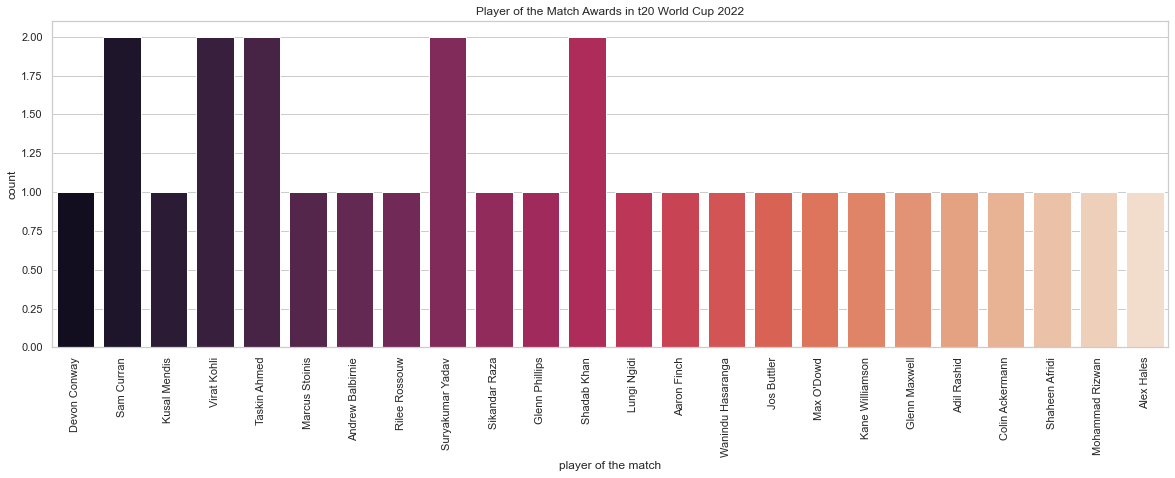

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(data=data, x="player of the match", palette="rocket")
plt.xticks(rotation=90)
plt.title("Player of the Match Awards in t20 World Cup 2022")
plt.show()

## **Best Bowlers in t20 World Cup 2022**

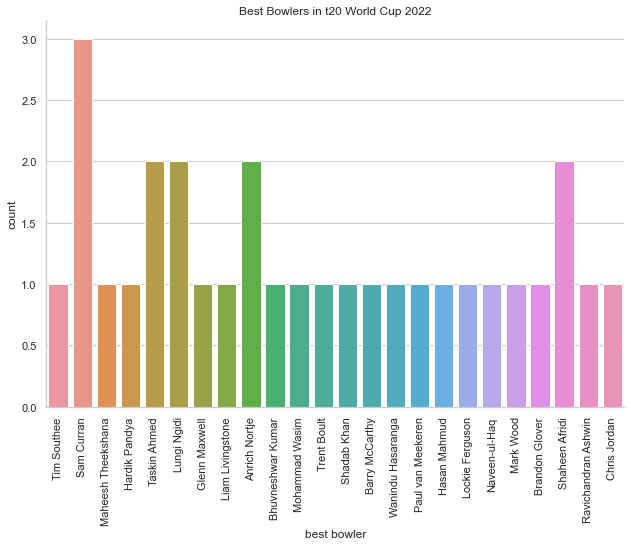

In [43]:
sns.catplot(x='best bowler', kind='count', data=data, height=6, aspect=1.5)
plt.title('Best Bowlers in t20 World Cup 2022')
plt.xticks(rotation=90)
plt.show()

## **Best stadium to bat**

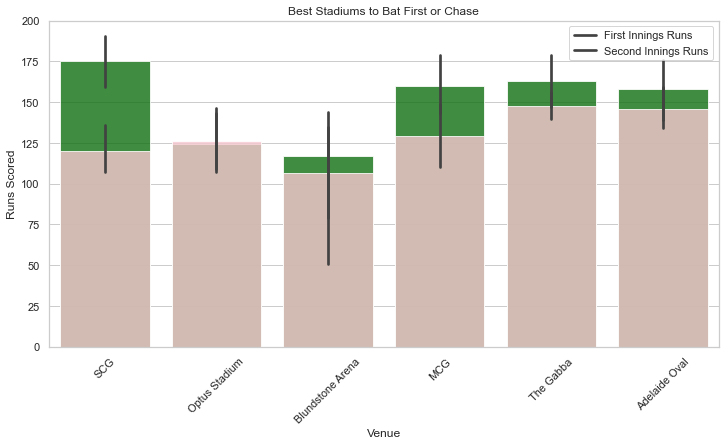

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='venue', y='first innings score', color='green', alpha=0.8)
sns.barplot(data=data, x='venue', y='second innings score', color='pink', alpha=0.8)
plt.xticks(rotation=45)
plt.title('Best Stadiums to Bat First or Chase')
plt.xlabel('Venue')
plt.ylabel('Runs Scored')
plt.legend(['First Innings Runs', 'Second Innings Runs'])
plt.show()
